# Practica nueve

Grupo 14:
* Joaquín Ibáñez Penalva
* Aurora Zuoris

Para la realización de esta práctica se usará la librería de numpy, pandas, matplotlib, y sklearn.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data_bin = pd.read_csv('spam_preprocesado_binario.csv')
data_real = pd.read_csv('spam_preprocesado_reales.csv')

data_bin.shape, data_real.shape

## Ejercicio uno

In [16]:
from sklearn.model_selection import train_test_split

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(data_bin.drop('v1', axis=1), data_bin['v1'], test_size=0.3, random_state=42)
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(data_real.drop('v1', axis=1), data_real['v1'], test_size=0.3, random_state=42)

X_train_bin.shape, X_test_bin.shape, y_train_bin.shape, y_test_bin.shape

((3900, 500), (1672, 500), (3900,), (1672,))

In [ ]:
data_bin['v1'].value_counts()

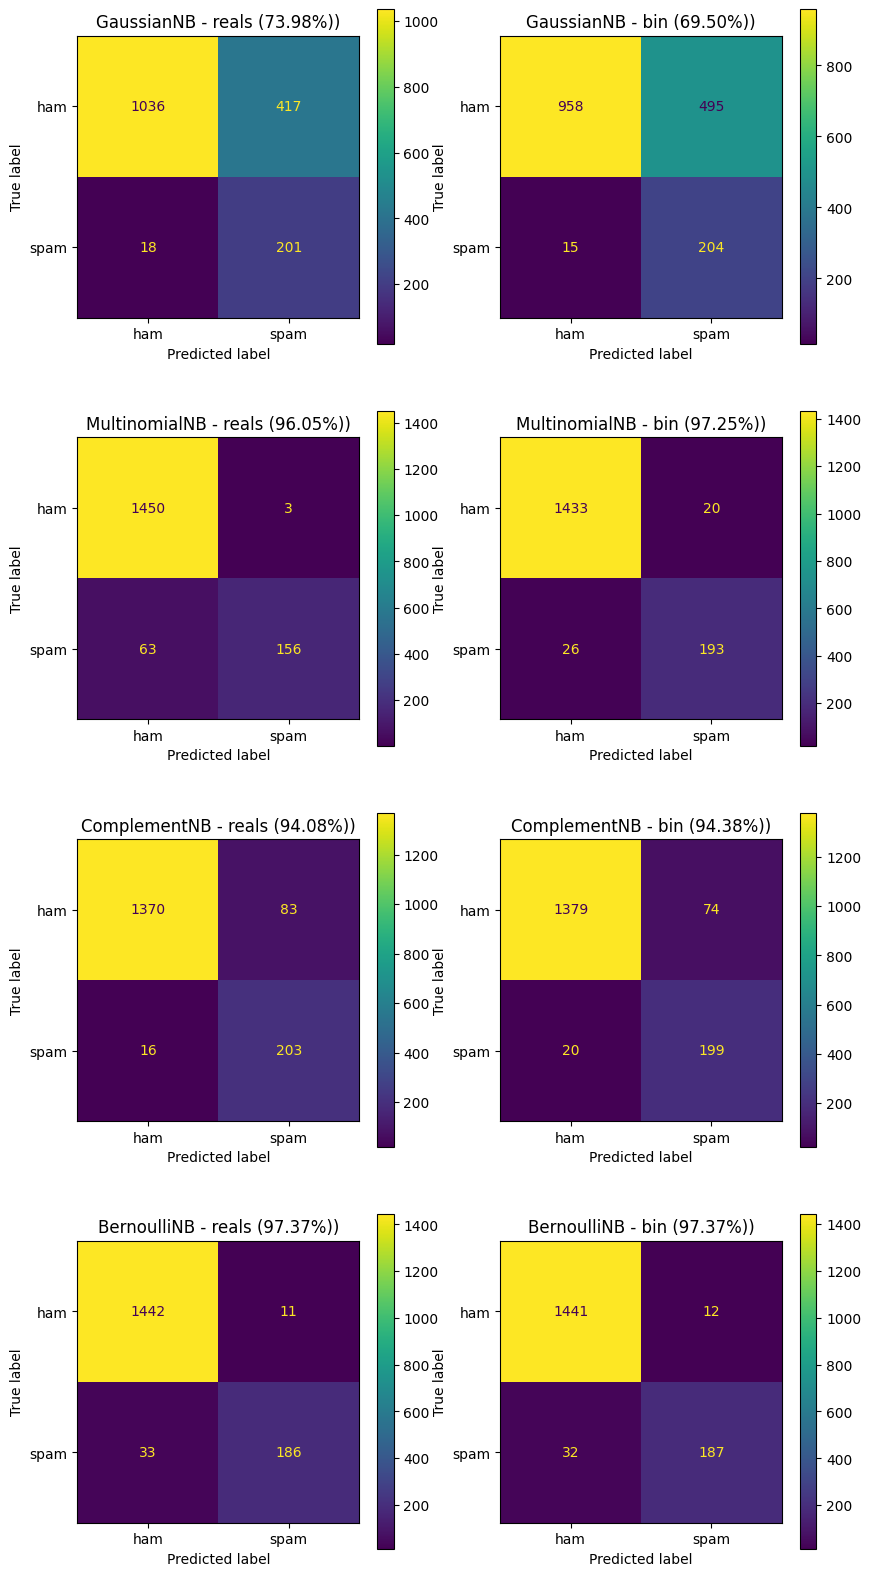

In [17]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

fig, axs = plt.subplots(4, 2, figsize=(10, 20))

models = [
    GaussianNB(),
    MultinomialNB(),
    ComplementNB(),
    BernoulliNB()
]

for i, model in enumerate(models):
    model.fit(X_train_real, y_train_real)
    p = model.predict(X_test_real)
    s = accuracy_score(y_test_real, p)
    c = confusion_matrix(y_test_real, p)
    ConfusionMatrixDisplay(c, display_labels=['ham', 'spam']).plot(ax=axs[i, 0])
    axs[i, 0].set_title(f'{model.__class__.__name__} - reals ({s:.2%}))')

    model.fit(X_train_bin, y_train_bin)
    p = model.predict(X_test_bin)
    s = accuracy_score(y_test_bin, p)
    c = confusion_matrix(y_test_bin, p)
    ConfusionMatrixDisplay(c, display_labels=['ham', 'spam']).plot(ax=axs[i, 1])
    axs[i, 1].set_title(f'{model.__class__.__name__} - bin ({s:.2%}))')


De todos los clasificadores, el GaussianNB era el peor de todos, con un rendimiento en torno al 70%. Mientras que los otros 3 clasificadores estan entre el 94% y el 97%. En cuanto al uso del dataset binario contra el de reales, el rendimiento de cual es mejor depende del clasificador, con algunos preferiendo uno ante el otro.

Dado el mal rendimiento del GaussianNB, se puede concluir que los datos no se ajustan a una distribución normal.
Para los otros clasificadores, ambos el MultinomialNB y el ComplementNB son ambos usados frecuentemente para la clasificación de texto, por lo que es normal que tengan un buen rendimiento con este dataset.
Aunque interesantemente, el Multinomial es mejor en este caso, aunque se haya demostrado que el ComplementNB es regularmente mejor que el MultinomialNB.
El BernoulliNB es un clasificador que se usa para datos binarios. En este caso tiene un rendimiento muy bueno en ambos datasets, hasta que es marginalmente mejor en el dataset de reales. Esto podría ser dado que las palabras no se repiten mucho, por lo que el dataset real se aproxime mucho a un dataset binario.

## Ejercicio dos

In [ ]:
# Importar regresión logística, perceptrón, svm y kNN
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from collections import defaultdict

models = [
    ("logistic regression", LogisticRegression(random_state=42)),
    ("perceptron", Perceptron(random_state=42)),
    ("SVC", SVC(random_state=42)),
    ("KNN(5)", KNeighborsClassifier(n_neighbors=5)),
    ("KNN(1)", KNeighborsClassifier(n_neighbors=1)),
]

accuracys = defaultdict(list)

for i, (model_name, model) in enumerate(models):
    model.fit(X_train_real, y_train_real)
    p = model.predict(X_test_real)
    s = accuracy_score(y_test_real, p)
    accuracys['model'].append(model_name)
    accuracys['real'].append(f"{s:.2%}")
    

    model.fit(X_train_bin, y_train_bin)
    p = model.predict(X_test_bin)
    s = accuracy_score(y_test_bin, p)
    accuracys['bin'].append(f"{s:.2%}")

pd.DataFrame(accuracys)

Los resultados obtenidos muestran que todos los clasificadores evaluados tienen un rendimiento bastante alto en la clasificación de mensajes SMS como legítimos o spam. 

La tasa de acierto para todos los clasificadores es superior al 93%, lo que indica que los modelos son capaces de clasificar correctamente la mayoría de los mensajes. En general, estos algoritmos funcionan bien en este problema debido a que los mensajes de spam y los mensajes legítimos suelen tener patrones muy diferentes debido a las palabras utilizadas en los mensajes. 

Sin embargo, sí se nota como el clasificador de Vecinos más cercanos es ligeramente peor a los otros tres cuando el hiperparametro del número de vecinos es superior a uno. Esto puede deberse a que la relacion de mensajes spam y no spam es de 1 a 7, por lo que este puede ser el motivo de que haya un mejor rendimiento con menos vecinos.

En comparacion a los clasificadores de Naive Bayes, se obtiene resultados similares menos en el de Gaussian Naive Bayes, que es ligeramente peor al resto por lo explicado en el apartado anterior.